<a href="https://www.kaggle.com/code/felipegonzalezurrego/project-ml-zoomcamp?scriptVersionId=149758892" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Introduction

Welcome, this notebook is about Binary Classification with a Software Defects competition! and is going to be used as project for the machine learning zoomcamp. The problem in hands is that we have to predict whether a C program has any defects or not. The metric we will use is Area Under the ROC Curve.

If you want to read the description of the original dataset, you can visit this page: https://www.kaggle.com/datasets/semustafacevik/software-defect-prediction.

## Reading the data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df_full_train = pd.read_csv('/kaggle/input/playground-series-s3e23/train.csv', index_col = "id")
df_test = pd.read_csv('/kaggle/input/playground-series-s3e23/test.csv', index_col = "id")

## EDA

### Let's explore the full train dataset

In [2]:
df_full_train.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [3]:
df_full_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loc,101763.0,37.347160,54.600401,1.0,13.00,22.00,42.00,3442.00
v(g),101763.0,5.492684,7.900855,1.0,2.00,3.00,6.00,404.00
ev(g),101763.0,2.845022,4.631262,1.0,1.00,1.00,3.00,165.00
iv(g),101763.0,3.498826,5.534541,1.0,1.00,2.00,4.00,402.00
n,101763.0,96.655995,171.147191,0.0,25.00,51.00,111.00,8441.00
v,101763.0,538.280956,1270.791601,0.0,97.67,232.79,560.25,80843.08
l,101763.0,0.111634,0.100096,0.0,0.05,0.09,0.15,1.00
d,101763.0,13.681881,14.121306,0.0,5.60,9.82,18.00,418.20
i,101763.0,27.573007,22.856742,0.0,15.56,23.36,34.34,569.78
e,101763.0,20853.589876,190571.405427,0.0,564.73,2256.23,10193.24,16846621.12


In [4]:
df_full_train.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

### Now is turn for the test dataset

In [5]:
df_test.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,,,,,,,,,,,,,,,,,,,,,
101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,22636.74,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,14482.46,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,116160.08,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,16135.47,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,2624.49,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [6]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loc,67842.0,37.855945,55.793918,1.0,13.00,22.00,42.0000,1891.00
v(g),67842.0,5.559462,8.237389,1.0,2.00,3.00,6.0000,470.00
ev(g),67842.0,2.857699,4.666370,1.0,1.00,1.00,3.0000,165.00
iv(g),67842.0,3.535715,5.339085,1.0,1.00,2.00,4.0000,402.00
n,67842.0,98.222178,179.123492,0.0,25.00,51.00,111.0000,8441.00
v,67842.0,548.422497,1318.416828,0.0,96.21,232.79,560.2500,80843.08
l,67842.0,0.111521,0.100840,0.0,0.04,0.09,0.1400,1.00
d,67842.0,13.762472,14.487425,0.0,5.50,9.82,18.0000,418.20
i,67842.0,27.635377,23.420521,0.0,15.54,23.23,34.2700,569.78
e,67842.0,22164.320048,207276.970847,0.0,562.94,2276.78,10112.4275,16846621.12


In [7]:
df_full_train.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

In [8]:
print(f'The shape of the full train dataset is: {df_full_train.shape}')
print(f'The shape of the test dataset is: {df_test.shape}')

The shape of the full train dataset is: (101763, 22)
The shape of the test dataset is: (67842, 21)


In [9]:
print(f'Null values in the full train dataset: {df_full_train.isnull().sum().sum()}')
print(f'Null values in the test dataset: {df_test.isnull().sum().sum()}')
print(f'Duplicates in the full train dataset: {df_full_train.duplicated().sum().sum()}')
print(f'Duplicates in the test dataset: {df_test.duplicated().sum().sum()}')


Null values in the full train dataset: 0
Null values in the test dataset: 0
Duplicates in the full train dataset: 0
Duplicates in the test dataset: 0


The test and train datasets are already splitted. Our target variable is the **defects** columns, so we have a full_train dataset with more than 100k rows and 21 features. There are not missing values nor duplicates in both datasets and also we can see that all the features are numerical values with no negatives.

### Target Distribution

In [10]:
#Visualization librabries
import matplotlib.pyplot as plt
import seaborn as sns

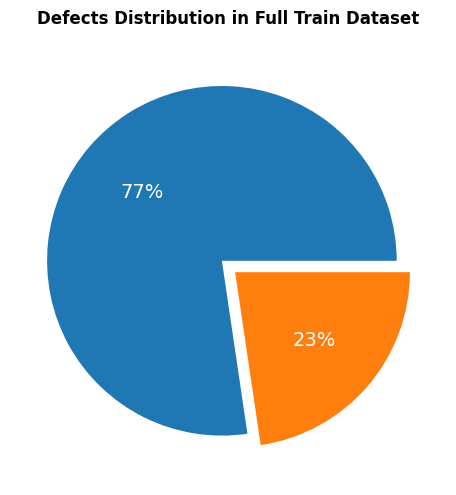

In [11]:
fig, ax = plt.subplots(figsize = (16,5))
ax.pie(
    df_full_train["defects"].value_counts(),
    explode = [.05 for i in range(df_full_train.defects.nunique())],
    autopct = "%1.f%%",
    textprops = {"size": 14, "color" : "white"}   
)

fig.suptitle('Defects Distribution in Full Train Dataset', fontsize = 12, fontweight = 'bold')
plt.tight_layout()

The target is quite unbalanced, only 23% of the samples belong to the positive class.

### Feature Distribution

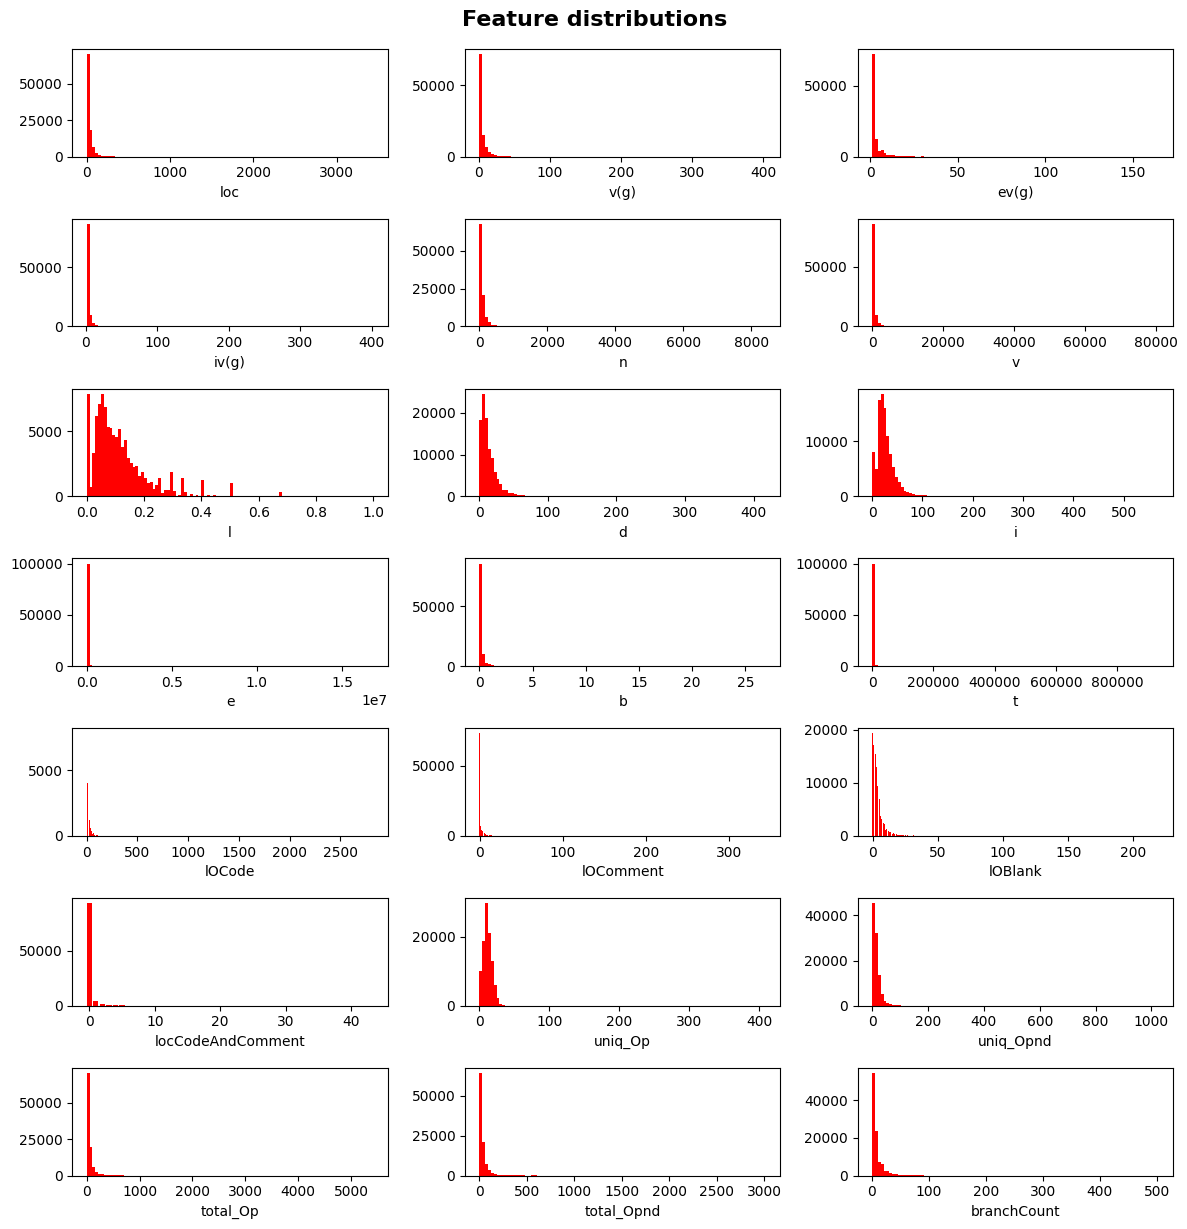

In [12]:
fig, axs = plt.subplots(7, 3, figsize=(12, 12))
for col, ax in zip(df_test.columns, axs.ravel()):
    if df_full_train[col].dtype == float:
        ax.hist(df_full_train[col], bins=100, color='red')
    else: #int
        vc = df_full_train[col].value_counts()
        ax.bar(vc.index, vc, color='red')
    ax.set_xlabel(col)
plt.tight_layout()
plt.suptitle('Feature distributions', y=1.02, fontsize=16, fontweight = "bold")
plt.show()

The features are right-skewed, we log-transform the data by FunctionTransformer(np.log1p)

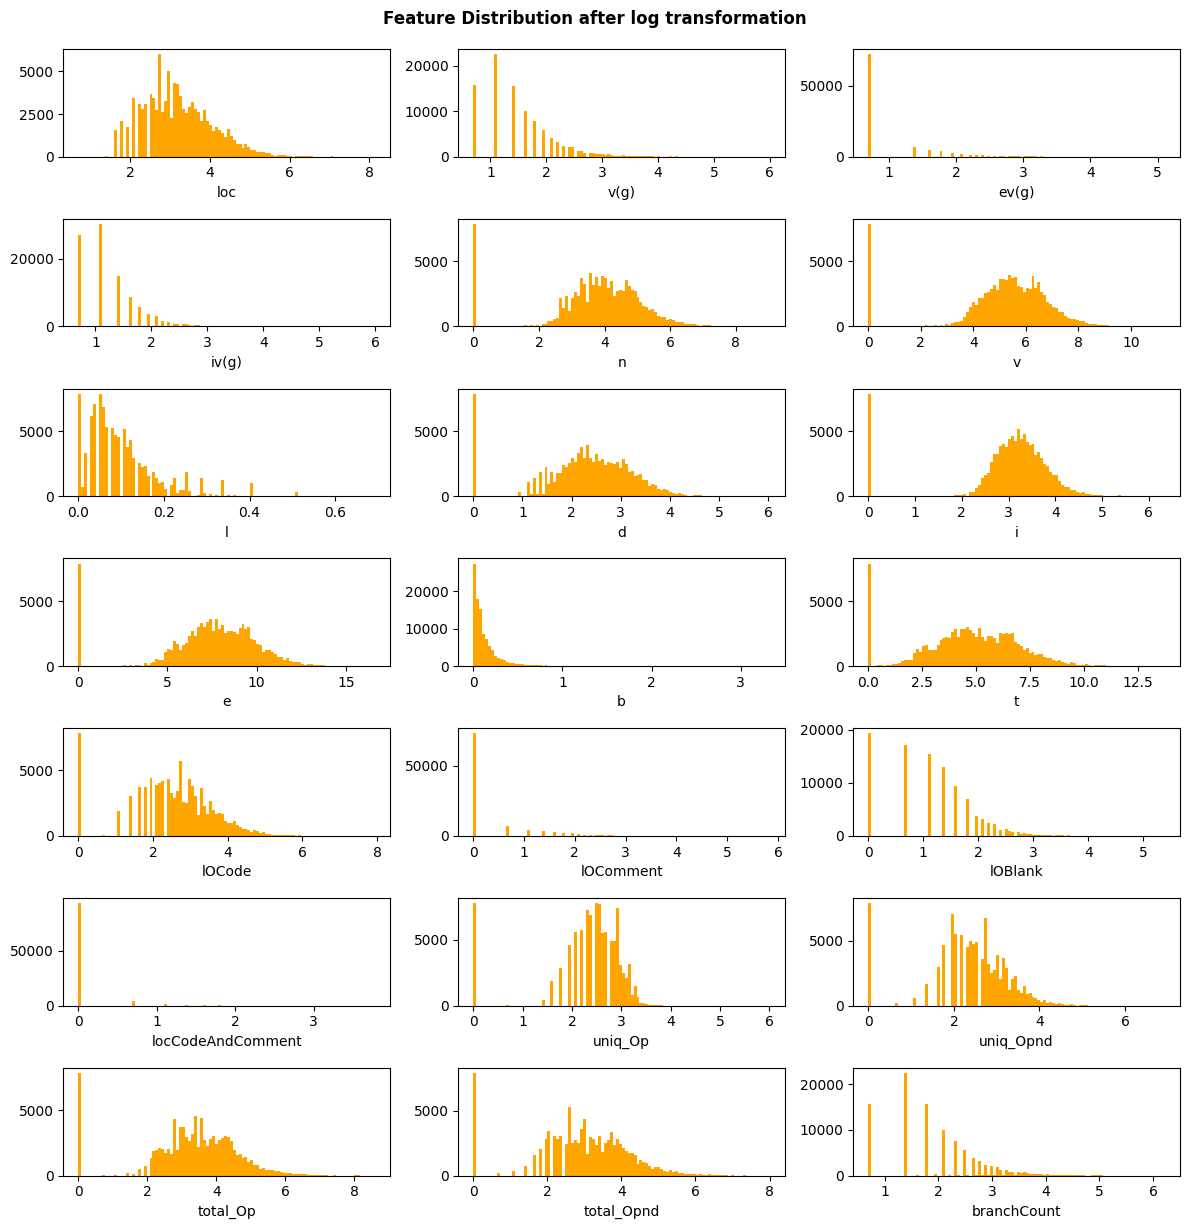

In [13]:
fig, axs = plt.subplots(7, 3, figsize = (12,12))
for col, ax in zip(df_test.columns, axs.ravel()):
    ax.hist(np.log1p(df_full_train[col]), bins = 100, color = "orange")
    ax.set_xlabel(col)
plt.tight_layout()
plt.suptitle("Feature Distribution after log transformation", fontsize = 12, y = 1.02, fontweight = "bold")
plt.show()

### Correlation

We want to see the correlation between features. Let's try to take a look.

Text(0.5, 1.0, 'Full traind dataset correlation matrix')

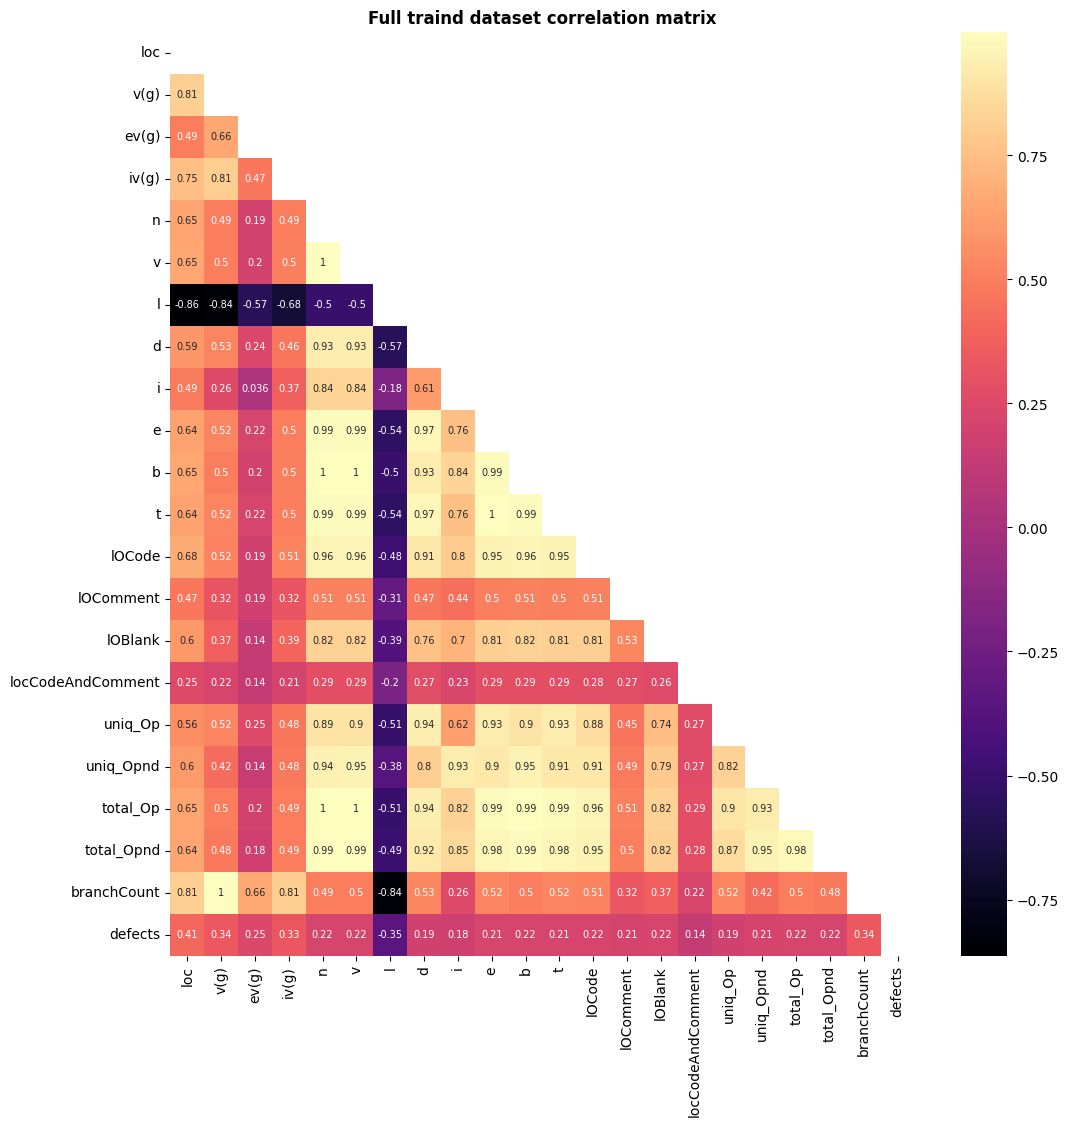

In [14]:
corr = df_full_train.corr(method = "spearman")
plt.figure(figsize = (12, 12))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, cmap = "magma", annot = True, annot_kws = {'size': 7})
plt.title("Full traind dataset correlation matrix", fontsize = 12, fontweight = "bold")

We can see from above that there are perfectly correlated features.

### Preparation

Now we start the preparation for the building of the machine learning models

### Cross Validation

In [15]:
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve

def cross_validation(model, label, log_transform = False):
    
    X = df_full_train.copy()
    y = X.pop("defects")
    
    if log_transform == True:
        X = np.log1p(X)
    
    #initiate prediction arrays and score lists
    val_pred = np.zeros((len(X)))
    #train_predictions = np.zeros((len(sample)))
    train_scores, val_scores = [], []
    kf = StratifiedKFold(shuffle=True, random_state=57, n_splits = 5)
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        #Train dataset
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        
        #Validation dataset
        X_val = X.iloc[val_idx]
        y_val = y.iloc[val_idx]
        
        
        #Train model    
        model.fit(X_train, y_train)
    
        #Predictions
        train_preds = model.predict_proba(X_train)[:, 1]
        val_preds = model.predict_proba(X_val)[:, 1]
    
        #Evaluation for a fold
        train_score = roc_auc_score(y_train, train_preds)
        val_score = roc_auc_score(y_val, val_preds)
    
        #Saving the model score for a fold
        train_scores.append(train_score)
        val_scores.append(val_score)
    
    print(f'val score: {np.mean(val_scores):.5f} ± {np.std(val_scores):.5f} | train score: {np.mean(train_scores):.5f} ± {np.std(train_scores):.5f} | {label}')
    return val_scores

### Models

Let's run 4 different models, with cross-validation and then we make some feature engeneering and model-tunning to see if the scores improves

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

score_list = pd.DataFrame()

models = [
    ('log', LogisticRegression(random_state = 57, max_iter = 10000)),
    ('rf', RandomForestClassifier(random_state = 57)),
    ('et', ExtraTreesClassifier(random_state = 57)),
    ('xgb', XGBClassifier(random_state = 57)),
]

for (label, model) in models:
    score_list[label] = cross_validation( model, label = label)

val score: 0.65673 ± 0.02120 | train score: 0.65573 ± 0.02169 | log
val score: 0.76832 ± 0.00220 | train score: 1.00000 ± 0.00000 | rf
val score: 0.76264 ± 0.00281 | train score: 1.00000 ± 0.00000 | et
val score: 0.78403 ± 0.00259 | train score: 0.84872 ± 0.00186 | xgb


We can see that both, the random forest and extra trees models have a perfect score in the train dataset, which implies overfitting since we are not giving any stop criteria (i.e max-depth or anything). Now let's see what happen if we log transform the data

In [17]:
score_list = pd.DataFrame()
for (label, model) in models:
    score_list[label] = cross_validation( model, label = label, log_transform = True)

val score: 0.78693 ± 0.00226 | train score: 0.78717 ± 0.00054 | log
val score: 0.76849 ± 0.00207 | train score: 1.00000 ± 0.00000 | rf
val score: 0.76200 ± 0.00248 | train score: 1.00000 ± 0.00000 | et
val score: 0.78403 ± 0.00260 | train score: 0.84872 ± 0.00186 | xgb


A clear improvement for the Logistic Regression model, but same results for the tree based models, because they already split the data. However Random forest and Extratrees models still overfitting so let's tune the model and see the changes.

### Model Tunning 

#### Logistic Regression

Set dual = False since n_samples > n_features (see documentation), we are going to try different regularization parameter C



In [18]:
score_list = pd.DataFrame()
labels = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

for label in labels:
    model =  LogisticRegression(random_state = 57, max_iter = 10000, dual = False, C = label)
    score_list[label] = cross_validation( model, label = label, log_transform = True)

val score: 0.66151 ± 0.00372 | train score: 0.66154 ± 0.00047 | 1e-06
val score: 0.74636 ± 0.00331 | train score: 0.74641 ± 0.00140 | 1e-05
val score: 0.77519 ± 0.00323 | train score: 0.77523 ± 0.00077 | 0.0001
val score: 0.78266 ± 0.00295 | train score: 0.78276 ± 0.00071 | 0.001
val score: 0.78494 ± 0.00275 | train score: 0.78510 ± 0.00068 | 0.01
val score: 0.78615 ± 0.00253 | train score: 0.78637 ± 0.00059 | 0.1
val score: 0.78693 ± 0.00226 | train score: 0.78717 ± 0.00054 | 1
val score: 0.78699 ± 0.00221 | train score: 0.78724 ± 0.00053 | 10


#### Random Forest

Let's try different min_samples_leaf, n_estimator, max_depth values and evaluate!

##### n_estimator and max_depth

It's time for take a look at the max_depth parameter to avoid that 1 score in train dataset. And look how it performs along n_estimator

In [19]:
scores = []
labels = [n for n in range(1, 152, 30)]
for d in [1, 5, 10]:
    score_list = pd.DataFrame()
    for label in labels:
        model =  RandomForestClassifier(random_state = 57, n_estimators = label, max_depth = d)
        score_list[label] = cross_validation( model, label = label, log_transform = True)
    scores.append(score_list)

val score: 0.68123 ± 0.00817 | train score: 0.68194 ± 0.00719 | 1
val score: 0.74553 ± 0.00220 | train score: 0.74592 ± 0.00074 | 31
val score: 0.74773 ± 0.00254 | train score: 0.74825 ± 0.00130 | 61
val score: 0.74901 ± 0.00361 | train score: 0.74938 ± 0.00241 | 91
val score: 0.75011 ± 0.00218 | train score: 0.75053 ± 0.00127 | 121
val score: 0.75014 ± 0.00196 | train score: 0.75053 ± 0.00119 | 151
val score: 0.77451 ± 0.00581 | train score: 0.77665 ± 0.00221 | 1
val score: 0.78602 ± 0.00286 | train score: 0.78852 ± 0.00072 | 31
val score: 0.78614 ± 0.00287 | train score: 0.78866 ± 0.00065 | 61
val score: 0.78613 ± 0.00278 | train score: 0.78867 ± 0.00070 | 91
val score: 0.78592 ± 0.00291 | train score: 0.78846 ± 0.00062 | 121
val score: 0.78598 ± 0.00286 | train score: 0.78847 ± 0.00065 | 151
val score: 0.75537 ± 0.00494 | train score: 0.78882 ± 0.00168 | 1
val score: 0.78963 ± 0.00274 | train score: 0.81991 ± 0.00061 | 31
val score: 0.79009 ± 0.00265 | train score: 0.82034 ± 0.00069

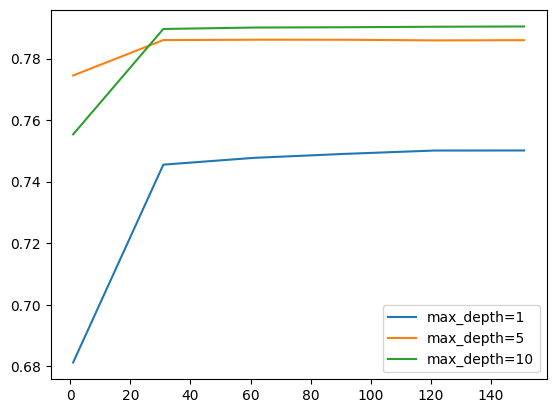

In [20]:
d = [1,5,10]
for i in range(0,len(d)):
    plt.plot(scores[i].columns, scores[i].mean(), label = 'max_depth=%d' %d[i])
plt.legend()

We take 10 as the max_depth, since it has the best auc score and avoids the overfitting issue.

#### min_samples_leaf
And the last tuning parameter is the min_leaf_samples

In [21]:
scores = []
d = 10
labels = [n for n in range(1, 152, 30)]
for msl in [1, 2, 5, 10]:
    score_list = pd.DataFrame()
    for label in labels:
        model =  RandomForestClassifier(random_state = 57, n_estimators = label, max_depth = d, min_samples_leaf = msl)
        score_list[label] = cross_validation( model, label = label, log_transform = True)
    scores.append(score_list)

val score: 0.75537 ± 0.00494 | train score: 0.78882 ± 0.00168 | 1
val score: 0.78963 ± 0.00274 | train score: 0.81991 ± 0.00061 | 31
val score: 0.79009 ± 0.00265 | train score: 0.82034 ± 0.00069 | 61
val score: 0.79019 ± 0.00262 | train score: 0.82045 ± 0.00061 | 91
val score: 0.79035 ± 0.00264 | train score: 0.82050 ± 0.00061 | 121
val score: 0.79044 ± 0.00272 | train score: 0.82050 ± 0.00062 | 151
val score: 0.75459 ± 0.00412 | train score: 0.78738 ± 0.00215 | 1
val score: 0.78976 ± 0.00263 | train score: 0.81943 ± 0.00068 | 31
val score: 0.79041 ± 0.00270 | train score: 0.81984 ± 0.00087 | 61
val score: 0.79035 ± 0.00279 | train score: 0.81987 ± 0.00075 | 91
val score: 0.79052 ± 0.00270 | train score: 0.81994 ± 0.00071 | 121
val score: 0.79046 ± 0.00271 | train score: 0.81991 ± 0.00069 | 151
val score: 0.75502 ± 0.00307 | train score: 0.78616 ± 0.00188 | 1
val score: 0.78949 ± 0.00246 | train score: 0.81737 ± 0.00051 | 31
val score: 0.79003 ± 0.00265 | train score: 0.81759 ± 0.00078

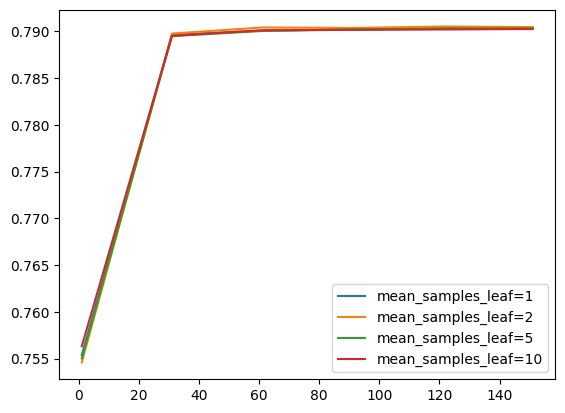

In [22]:
msl = [1,2,5,10]
for i in range(0,len(msl)):
    plt.plot(scores[i].columns, scores[i].mean(), label = 'mean_samples_leaf=%d' %msl[i])
plt.legend()

looks like the best configuration for the Random Forest model is: max_depth = 10 and min_samples_leaf = 2, but let's make a zoom in this parameter to see how it changes the model performance. Now we can continue with extra trees model.

### Extra Trees
We are going to tune the same parameters that were tunned in the Random Forest model

In [23]:
scores = []
labels = [n for n in range(1, 152, 30)]
for d in [1, 5, 10, 20]:
    score_list = pd.DataFrame()
    for label in labels:
        model =  ExtraTreesClassifier(random_state = 57, n_estimators = label, max_depth = d)
        score_list[label] = cross_validation( model, label = label, log_transform = True)
    scores.append(score_list)

val score: 0.55968 ± 0.00948 | train score: 0.55934 ± 0.01055 | 1
val score: 0.76676 ± 0.00297 | train score: 0.76683 ± 0.00072 | 31
val score: 0.76929 ± 0.00259 | train score: 0.76932 ± 0.00060 | 61
val score: 0.76950 ± 0.00237 | train score: 0.76957 ± 0.00080 | 91
val score: 0.77048 ± 0.00236 | train score: 0.77057 ± 0.00080 | 121
val score: 0.77155 ± 0.00239 | train score: 0.77155 ± 0.00097 | 151
val score: 0.73199 ± 0.00872 | train score: 0.73151 ± 0.00595 | 1
val score: 0.77787 ± 0.00294 | train score: 0.77824 ± 0.00091 | 31
val score: 0.77756 ± 0.00318 | train score: 0.77827 ± 0.00049 | 61
val score: 0.77801 ± 0.00330 | train score: 0.77875 ± 0.00038 | 91
val score: 0.77844 ± 0.00331 | train score: 0.77927 ± 0.00036 | 121
val score: 0.77825 ± 0.00323 | train score: 0.77905 ± 0.00046 | 151
val score: 0.76998 ± 0.00447 | train score: 0.77850 ± 0.00109 | 1
val score: 0.78457 ± 0.00254 | train score: 0.79530 ± 0.00104 | 31
val score: 0.78475 ± 0.00261 | train score: 0.79532 ± 0.00080

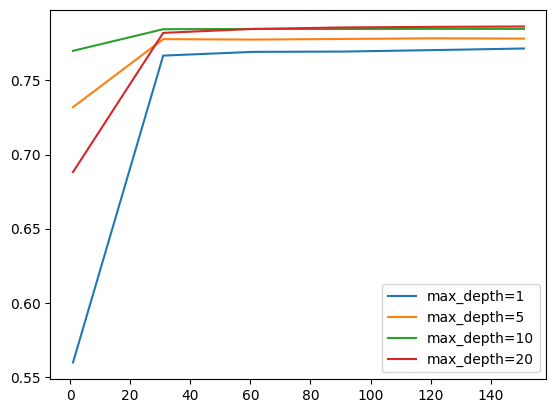

In [24]:
d = [1,5,10,20]
for i in range(0,len(d)):
    plt.plot(scores[i].columns, scores[i].mean(), label = 'max_depth=%d' %d[i])
plt.legend()

Again we take the max_depth = 10

#### min_samples_leaf

In [25]:
scores = []
d = 10
labels = [n for n in range(1, 152, 30)]
for msl in [1, 5, 10]:
    score_list = pd.DataFrame()
    for label in labels:
        model =  ExtraTreesClassifier(random_state = 57, n_estimators = label, max_depth = d, min_samples_leaf = msl)
        score_list[label] = cross_validation( model, label = label, log_transform = True)
    scores.append(score_list)

val score: 0.76998 ± 0.00447 | train score: 0.77850 ± 0.00109 | 1
val score: 0.78457 ± 0.00254 | train score: 0.79530 ± 0.00104 | 31
val score: 0.78475 ± 0.00261 | train score: 0.79532 ± 0.00080 | 61
val score: 0.78472 ± 0.00262 | train score: 0.79528 ± 0.00081 | 91
val score: 0.78482 ± 0.00258 | train score: 0.79555 ± 0.00072 | 121
val score: 0.78479 ± 0.00254 | train score: 0.79540 ± 0.00074 | 151
val score: 0.77384 ± 0.00367 | train score: 0.77886 ± 0.00209 | 1
val score: 0.78425 ± 0.00309 | train score: 0.79202 ± 0.00069 | 31
val score: 0.78412 ± 0.00315 | train score: 0.79177 ± 0.00065 | 61
val score: 0.78413 ± 0.00302 | train score: 0.79184 ± 0.00064 | 91
val score: 0.78422 ± 0.00301 | train score: 0.79192 ± 0.00069 | 121
val score: 0.78413 ± 0.00291 | train score: 0.79173 ± 0.00069 | 151
val score: 0.77159 ± 0.00478 | train score: 0.77578 ± 0.00168 | 1
val score: 0.78364 ± 0.00295 | train score: 0.78996 ± 0.00094 | 31
val score: 0.78363 ± 0.00298 | train score: 0.78984 ± 0.00063

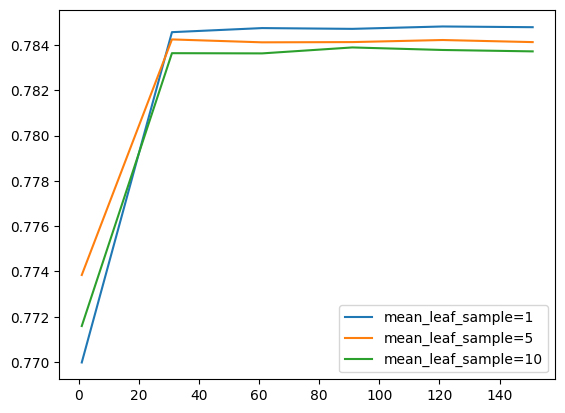

In [26]:
msl = [1,5,10]
for i in range(0,len(msl)):
    plt.plot(scores[i].columns, scores[i].mean(), label = 'mean_leaf_sample=%d' %msl[i])
plt.legend()

### XGBoost

Our final model in this tunning process
Learning rate, max_depth, min_child_weight, 

#### Learning rate

In [27]:
scores = []
for eta in [0.01, 0.1, 0.2, 0.3]:
    score_list = pd.DataFrame()
    for label in range(1, 152, 30):
        model =  XGBClassifier(random_state = 57, eta = eta, n_estimators = label)
        score_list[label] = cross_validation( model, label = label)
    scores.append(score_list)

val score: 0.78577 ± 0.00241 | train score: 0.79116 ± 0.00077 | 1
val score: 0.78883 ± 0.00247 | train score: 0.79457 ± 0.00063 | 31
val score: 0.78922 ± 0.00254 | train score: 0.79577 ± 0.00076 | 61
val score: 0.78963 ± 0.00272 | train score: 0.79686 ± 0.00080 | 91
val score: 0.78997 ± 0.00239 | train score: 0.79823 ± 0.00081 | 121
val score: 0.79037 ± 0.00247 | train score: 0.79946 ± 0.00070 | 151
val score: 0.78577 ± 0.00241 | train score: 0.79116 ± 0.00077 | 1
val score: 0.79094 ± 0.00247 | train score: 0.80546 ± 0.00074 | 31
val score: 0.79116 ± 0.00268 | train score: 0.81420 ± 0.00069 | 61
val score: 0.79096 ± 0.00258 | train score: 0.81921 ± 0.00101 | 91
val score: 0.79071 ± 0.00258 | train score: 0.82364 ± 0.00097 | 121
val score: 0.79035 ± 0.00261 | train score: 0.82789 ± 0.00054 | 151
val score: 0.78577 ± 0.00241 | train score: 0.79116 ± 0.00077 | 1
val score: 0.79053 ± 0.00247 | train score: 0.81438 ± 0.00094 | 31
val score: 0.78970 ± 0.00241 | train score: 0.82309 ± 0.00137

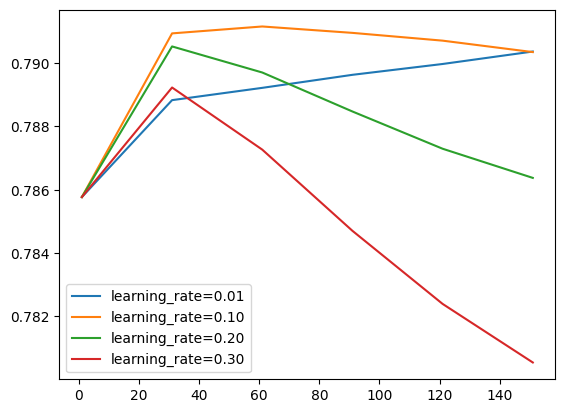

In [28]:
eta = [0.01, 0.1, 0.2, 0.3]
for i in range(0,len(eta)):
    plt.plot(scores[i].columns, scores[i].mean(), label = 'learning_rate=%.2f' %eta[i])
plt.legend()

In [29]:
scores = []
eta = 0.1
for d in [1, 3, 5, 10]:
    score_list = pd.DataFrame()
    for label in range(1, 152, 30):
        model =  XGBClassifier(random_state = 57, eta = eta, max_depth = d, n_estimators = label)
        score_list[label] = cross_validation( model, label = label)
    scores.append(score_list)

val score: 0.70735 ± 0.00566 | train score: 0.70817 ± 0.00369 | 1
val score: 0.78075 ± 0.00300 | train score: 0.78126 ± 0.00081 | 31
val score: 0.78575 ± 0.00280 | train score: 0.78639 ± 0.00072 | 61
val score: 0.78685 ± 0.00286 | train score: 0.78787 ± 0.00065 | 91
val score: 0.78757 ± 0.00291 | train score: 0.78881 ± 0.00076 | 121
val score: 0.78820 ± 0.00304 | train score: 0.78942 ± 0.00073 | 151
val score: 0.78009 ± 0.00398 | train score: 0.78058 ± 0.00119 | 1
val score: 0.78964 ± 0.00286 | train score: 0.79130 ± 0.00074 | 31
val score: 0.79115 ± 0.00291 | train score: 0.79447 ± 0.00077 | 61
val score: 0.79157 ± 0.00297 | train score: 0.79616 ± 0.00060 | 91
val score: 0.79179 ± 0.00296 | train score: 0.79738 ± 0.00065 | 121
val score: 0.79185 ± 0.00289 | train score: 0.79845 ± 0.00061 | 151
val score: 0.78531 ± 0.00242 | train score: 0.78837 ± 0.00069 | 1
val score: 0.79103 ± 0.00267 | train score: 0.79883 ± 0.00066 | 31
val score: 0.79166 ± 0.00275 | train score: 0.80481 ± 0.00046

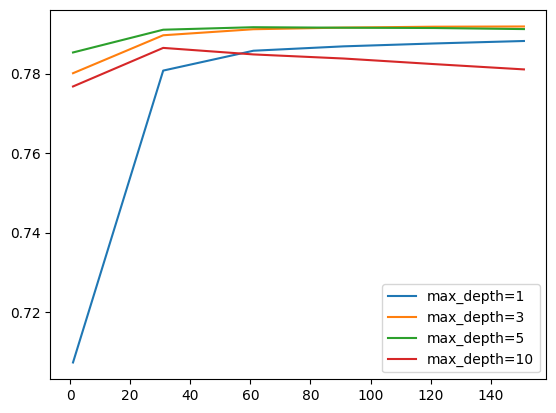

In [30]:
d = [1, 3, 5, 10]
for i in range(0,len(d)):
    plt.plot(scores[i].columns, scores[i].mean(), label = 'max_depth=%d' %d[i])
plt.legend()

In [31]:
scores = []
eta = 0.1
d = 10
for mdw in [1, 5, 10, 20]:
    score_list = pd.DataFrame()
    for label in range(1, 152, 30):
        model =  XGBClassifier(random_state = 57, n_estimators = label, eta = eta, max_depth = d, min_child_weight = mdw)
        score_list[label] = cross_validation( model, label = label)
    scores.append(score_list)

val score: 0.77676 ± 0.00252 | train score: 0.80814 ± 0.00102 | 1
val score: 0.78646 ± 0.00305 | train score: 0.86323 ± 0.00102 | 31
val score: 0.78482 ± 0.00288 | train score: 0.88894 ± 0.00215 | 61
val score: 0.78379 ± 0.00298 | train score: 0.89866 ± 0.00184 | 91
val score: 0.78239 ± 0.00305 | train score: 0.90906 ± 0.00244 | 121
val score: 0.78105 ± 0.00308 | train score: 0.91798 ± 0.00302 | 151
val score: 0.77780 ± 0.00312 | train score: 0.80614 ± 0.00043 | 1
val score: 0.78719 ± 0.00266 | train score: 0.84676 ± 0.00105 | 31
val score: 0.78613 ± 0.00275 | train score: 0.86419 ± 0.00126 | 61
val score: 0.78546 ± 0.00298 | train score: 0.87047 ± 0.00144 | 91
val score: 0.78471 ± 0.00284 | train score: 0.87620 ± 0.00094 | 121
val score: 0.78407 ± 0.00291 | train score: 0.88254 ± 0.00183 | 151
val score: 0.77931 ± 0.00237 | train score: 0.80375 ± 0.00046 | 1
val score: 0.78786 ± 0.00268 | train score: 0.83729 ± 0.00136 | 31
val score: 0.78715 ± 0.00269 | train score: 0.85090 ± 0.00035

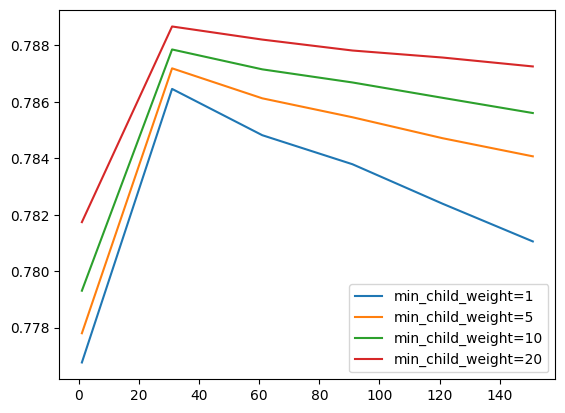

In [32]:
mdw = [1, 5, 10, 20]
for i in range(0,len(mdw)):
    plt.plot(scores[i].columns, scores[i].mean(), label = 'min_child_weight=%d' %mdw[i])
plt.legend()

### Final Model

In [33]:
df_full_train

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False


In [34]:
X_train = df_full_train.copy()
y_train = X_train.pop("defects")
model =  XGBClassifier(random_state = 57, 
                           eta = 0.1, max_depth = 5,
                           n_estimators = 60,
                           scale_pos_weight = 1)
model.fit(X_train, y_train)
submission = df_test.copy()
submission['defects'] = model.predict_proba(submission)[:, 1]
train_pred = model.predict_proba(X_train)[:, 1]
train_score = roc_auc_score(y_train, train_pred)
train_score

0.8032262180511647

In [35]:
'''
X_train = df_full_train.copy()
y_train = X_train.pop("defects")
model =  RandomForestClassifier(random_state = 57, 
                           max_depth = 10,
                           n_estimators = 50,
                           min_samples_leaf = 2)
model.fit(X_train, y_train)
submission = df_test.copy()
submission['defects'] = model.predict_proba(submission)[:, 1]
train_pred = model.predict_proba(X_train)[:, 1]
train_score = roc_auc_score(y_train, train_pred)
train_score'''

'\nX_train = df_full_train.copy()\ny_train = X_train.pop("defects")\nmodel =  RandomForestClassifier(random_state = 57, \n                           max_depth = 10,\n                           n_estimators = 50,\n                           min_samples_leaf = 2)\nmodel.fit(X_train, y_train)\nsubmission = df_test.copy()\nsubmission[\'defects\'] = model.predict_proba(submission)[:, 1]\ntrain_pred = model.predict_proba(X_train)[:, 1]\ntrain_score = roc_auc_score(y_train, train_pred)\ntrain_score'

In [36]:
'''
X_train = df_full_train.copy()
y_train = X_train.pop("defects")
model =  ExtraTreesClassifier(random_state = 57, 
                           max_depth = 20,
                           n_estimators = 50,
                           min_samples_leaf = 1)
model.fit(X_train, y_train)
submission = df_test.copy()
submission['defects'] = model.predict_proba(submission)[:, 1]
train_pred = model.predict_proba(X_train)[:, 1]
train_score = roc_auc_score(y_train, train_pred)
train_score'''

'\nX_train = df_full_train.copy()\ny_train = X_train.pop("defects")\nmodel =  ExtraTreesClassifier(random_state = 57, \n                           max_depth = 20,\n                           n_estimators = 50,\n                           min_samples_leaf = 1)\nmodel.fit(X_train, y_train)\nsubmission = df_test.copy()\nsubmission[\'defects\'] = model.predict_proba(submission)[:, 1]\ntrain_pred = model.predict_proba(X_train)[:, 1]\ntrain_score = roc_auc_score(y_train, train_pred)\ntrain_score'

In [37]:
'''X_train = df_full_train.copy()
y_train = X_train.pop("defects")
model =  RandomForestClassifier(random_state = 57, 
                           )
model.fit(X_train, y_train)
submission = df_test.copy()
submission['defects'] = model.predict_proba(submission)[:, 1]
train_pred = model.predict_proba(X_train)[:, 1]
train_score = roc_auc_score(y_train, train_pred)
train_score'''

'X_train = df_full_train.copy()\ny_train = X_train.pop("defects")\nmodel =  RandomForestClassifier(random_state = 57, \n                           )\nmodel.fit(X_train, y_train)\nsubmission = df_test.copy()\nsubmission[\'defects\'] = model.predict_proba(submission)[:, 1]\ntrain_pred = model.predict_proba(X_train)[:, 1]\ntrain_score = roc_auc_score(y_train, train_pred)\ntrain_score'

## Submission

In [38]:
submission = df_test.copy()
submission['defects'] = model.predict_proba(submission)[:, 1]
submission.defects.to_csv('submission.csv')